This summarises what is found in Lesson 2 of the Stats501 in Penn State University's Regression Methods Course

This lesson deals with SLR's model evaluation. 

https://newonlinecourses.science.psu.edu/stat501/node/260/

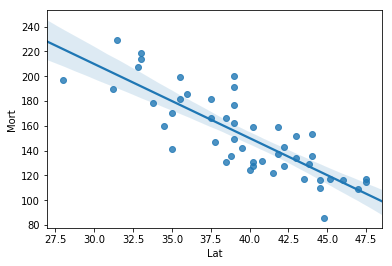

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('skincancer.csv')

sns.regplot(data.Lat, data.Mort)
plt.show()

We have done model fitting for SLR before, so we will call statsmodels to get the necessary information that we have gotten before rather than doing the same processes again.

These include:
1) MSE
2) b1
3) b0

In [7]:
X = sm.add_constant(data.Lat)
result = sm.OLS(data.Mort, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           3.31e-13
Time:                        09:34:37   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        389.1894     23.812     16.344      0.000     341.285     437.094
Lat           -5.9776      0.598     -9.990      0.000      -7.181      -4.774
==============================================================================
Omnibus:                        0.740   Durbin-Watson:                   2.131
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.773
Skew:                           0.094   Prob(JB):                        0.679
Kurtosis:                       2.414   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once we have established a relation between X and Y, we want to know the likelihood that the slope of the curve being 0 is very, very low (like say, less than 1% likelihood)

The slope also gives us an idea about the estimate of the slope. However, since it is an estimate, the true value of b1 is unknown. It would be more likely that the true value is a range of value, and among one of the values in the range is true. However we also need to limit this range of values. We thus have a "confidence interval", an interval of values that we are 99% or 95% sure that the true value resides in. 

To get the confidence interval, we use:

$ Sample\ Estimate \pm (t-multiplier \times standard\ error) $

Notation - 

$b_1 \pm t_{(\alpha/2, n-2)}\times \left( \frac{\sqrt{MSE}}{\sqrt{\sum(x_i-\bar{x})^2}} \right)$

For Python, we can do a function to take in an arg ($b_1$ or $b_0$) and produce the confidence interval.

In [8]:
from scipy.stats import t
print(result.conf_int())

def CInt(var, df):
    tmult = t.ppf(0.975, df = df)
    mse = result.mse_resid
    se = result.bse
    CI = [(result.params[var] + tmult*se[var]), (result.params[var] - tmult*se[var])]
    CI.sort()
    return CI
    
b1 = 'Lat'
tmult = t.ppf(0.975, df = 47)
mse = result.mse_resid
se = result.bse
cib1 = [(result.params[b1] + tmult*se[b1]), (result.params[b1] - tmult*se[b1])]
cib1.sort()

cib1 = CInt('Lat', 47)
cib0 = CInt('const', 47)

print (cib1)
print (cib0)


                0           1
const  341.285151  437.093551
Lat     -7.181404   -4.773867
[-7.181404430206724, -4.773867058617141]
[341.2851506147255, 437.093551446513]


If the confidence interval for β1 contains 0, then we conclude that there is no evidence of a linear relationship between the predictor x and the response y in the population. On the other hand, if the confidence interval for β1 does not contain 0, then we conclude that there is evidence of a linear relationship between the predictor x and the response y in the population.

In [9]:
pred = result.predict(X)